**Author** : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)

## Import Library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


import plotly.express as px

%matplotlib inline

## Read Dataset

In [2]:
customer = pd.read_csv('C:\My Files\Document\Coding\Datasheet\marketing_campaign.csv', sep='\t')

## Data Preparation

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
customer.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [5]:
customer.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
customer = customer.dropna()

## Feature Engineering

### Age of Customers

Let's calculate the age of every customer from the birth year of customers. Since the customers enrollment with the company between 2012 and 2014, so we assume that the data was collected in January 2015 for the sake of simplicity.

In [7]:
import datetime as dt
customer['Age'] = 2015 - customer.Year_Birth

### Months Since Enrollment

In [8]:
customer['Dt_Customer'] = pd.to_datetime(customer['Dt_Customer'])
customer['Month_Customer'] = 12.0 * (2015 - customer.Dt_Customer.dt.year ) + (1 - customer.Dt_Customer.dt.month)

### Total Spendings

In [9]:
customer['TotalSpendings'] =  customer.MntWines + customer.MntFruits + customer.MntMeatProducts + customer.MntFishProducts + customer.MntSweetProducts + customer.MntGoldProds

### Age Groups

In [10]:
customer.loc[(customer['Age'] >= 13) & (customer['Age'] <= 19), 'AgeGroup'] = 'Teen'
customer.loc[(customer['Age'] >= 20) & (customer['Age']<= 39), 'AgeGroup'] = 'Adult'
customer.loc[(customer['Age'] >= 40) & (customer['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
customer.loc[(customer['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

### Number of Children

In [11]:
customer['Children'] = customer['Kidhome'] + customer['Teenhome']

### Marital Status

In [12]:
customer.Marital_Status = customer.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

### Removing Outliers

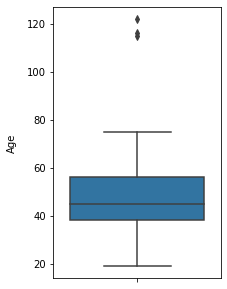

In [13]:
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Age);
plt.ylabel('Age', fontsize=10, labelpad=10);

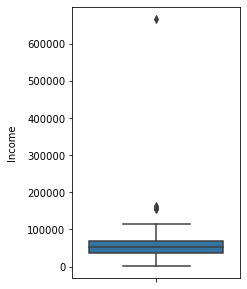

In [14]:
plt.figure(figsize=(3,5))
sns.boxplot(y=customer.Income);
plt.ylabel('Income', fontsize=10, labelpad=10);

<b>Insights:</b>

There are some customers aged above 100. This is unlikely to happen. Let's drop those customers from data
There are some customers who are earning more than 120,000 and some of them even more than 600,000. They are clearly the outliers in the data, so we will leave them out

In [15]:
customer = customer[customer.Age < 100]
customer = customer[customer.Income < 120000]

## Exploratory Data Analysis

## Marital Status

In [16]:
maritalstatus = customer.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

<b>Insights:</b>

2/3rd of the customers are living with partners while about 1/3rd are singles

### Average Spendings: Marital Status Wise

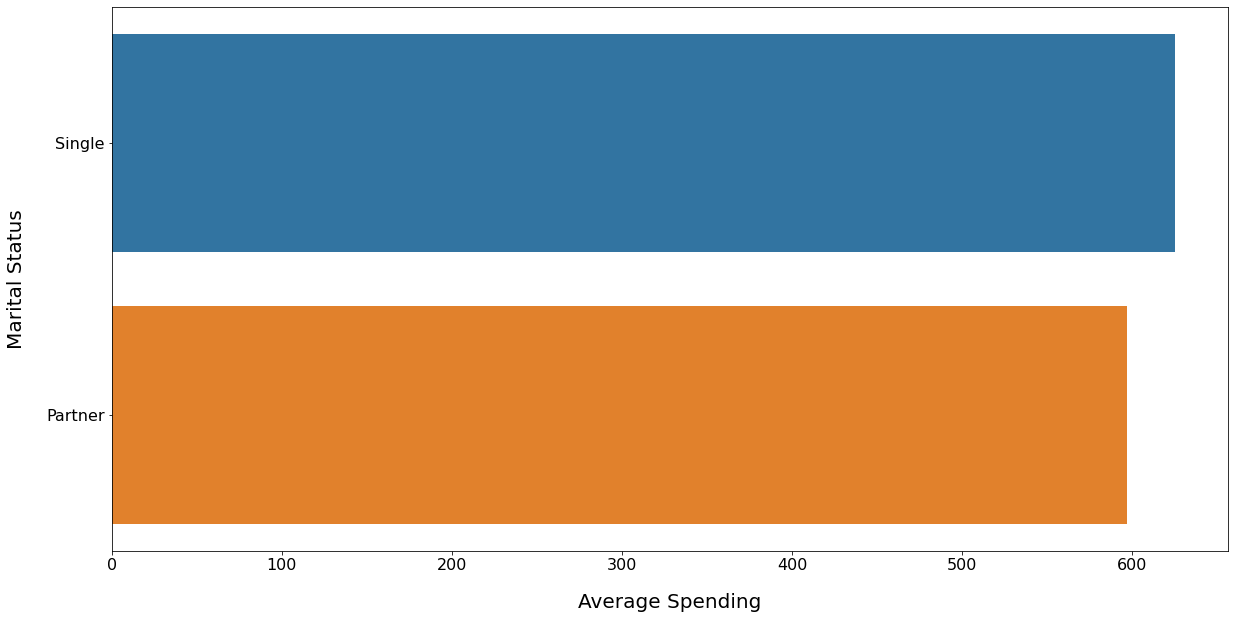

In [17]:
maritalspending = customer.groupby('Marital_Status')['TotalSpendings'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Average Spending", y="Marital Status");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Average Spending', fontsize=20, labelpad=20)
plt.ylabel('Marital Status', fontsize=20, labelpad=20);

<b>Insights:</b>

Despite being the minority, the Singles spent more money on the average as compared to the customers having partners

### Education Level

In [18]:
education = customer.Education.value_counts()

fig = px.pie(education, 
             values = education.values, 
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

<b>Insights:</b>

- Half of the customers are University graduates
- There are more customers who hold PhD degrees than the customers who did Masters

### Child Status

In [19]:
children = customer.Children.value_counts()

fig = px.pie(children, 
             values = children.values, 
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

<b>Insights:</b>

- About 50% of the customers have only one child
- 28% of the customers do-not have any children at home while 19% of them have 2 children

### Average Spendings: Child Status Wise

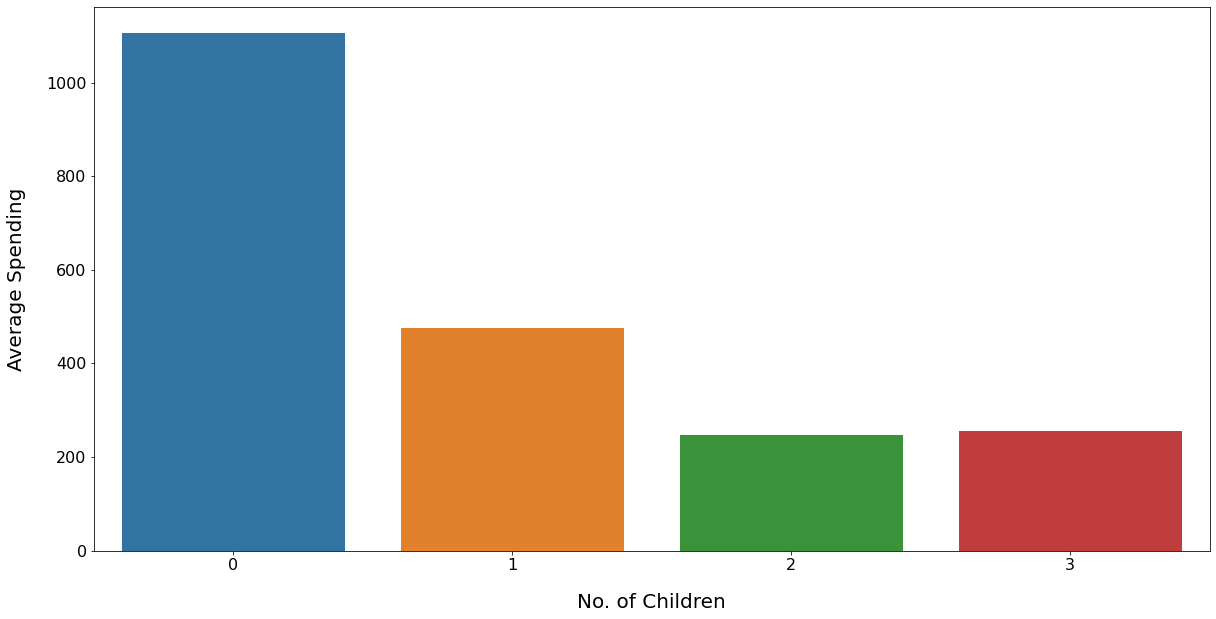

In [20]:
childrenspending = customer.groupby('Children')['TotalSpendings'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

<b>Insights:</b>

- Customers who don't have any children at home spent higher than the customers having 1 children.
- The customers having 1 children are spending higher than the customers havin 2 and 3 children.

### Age Distribution of Customers

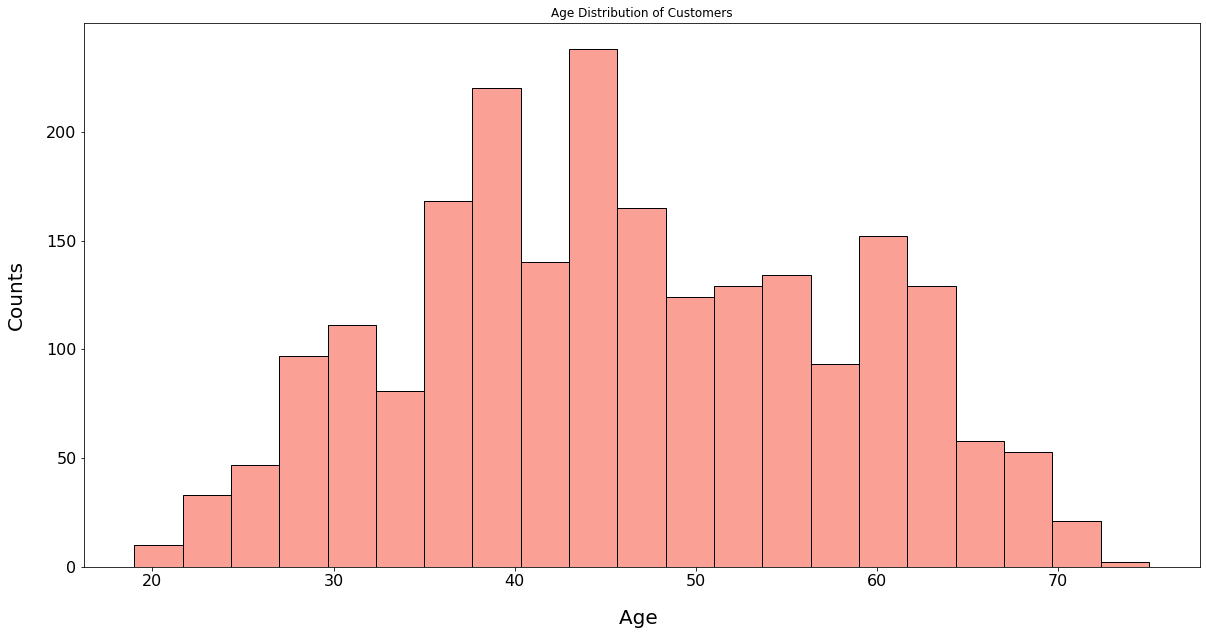

In [21]:
plt.figure(figsize=(20,10))
ax = sns.histplot(data = customer.Age, color='salmon')
ax.set(title = "Age Distribution of Customers");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age ', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

<b>Insights:</b>

Age of the customers is nearly normally distributed, with most of the customers aged between 40 and 60

## Relationship: Age vs Spendings

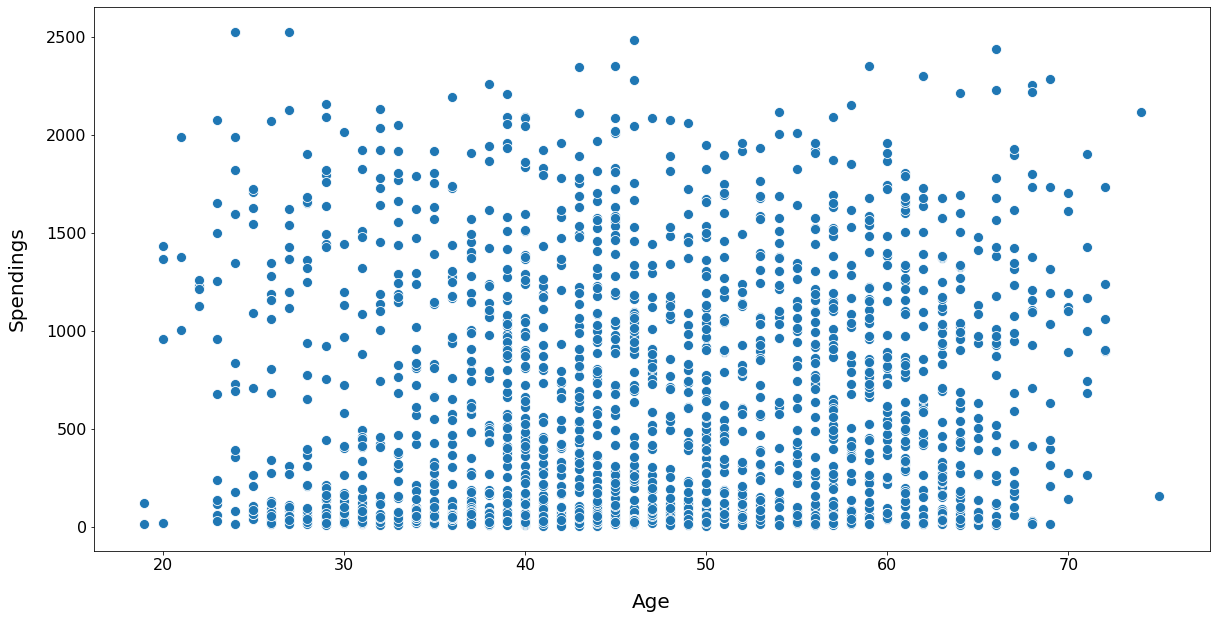

In [22]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=customer.Age, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

<b>Insights:</b>

There doesn't seem to be any clear relationship between age of customers and their spending habits

### Customers Segmentation: Age Group Wise

In [23]:
agegroup = customer.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'], 
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups', 
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

<b>Insights:</b>
- More than 50% of the customers are Middle Age Adults aged between 40 and 60
- The 2nd famous age category is Adult, aged between 20 and 40

### Average Spendings: Age Group Wise

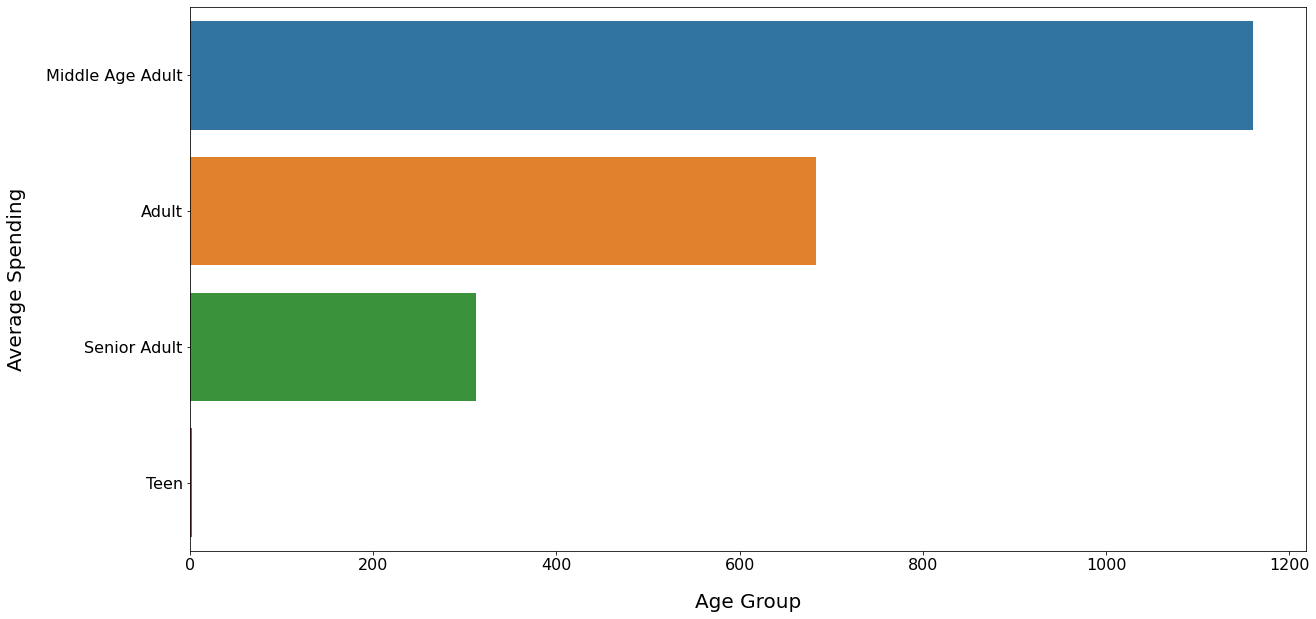

In [24]:
agegroupspending = customer.groupby('AgeGroup')['TotalSpendings'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Average Spending", y='Age Group');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

<b>Insights:</b>

Middle age adults spent much more than the other age groups

### Income Distribution of Customers

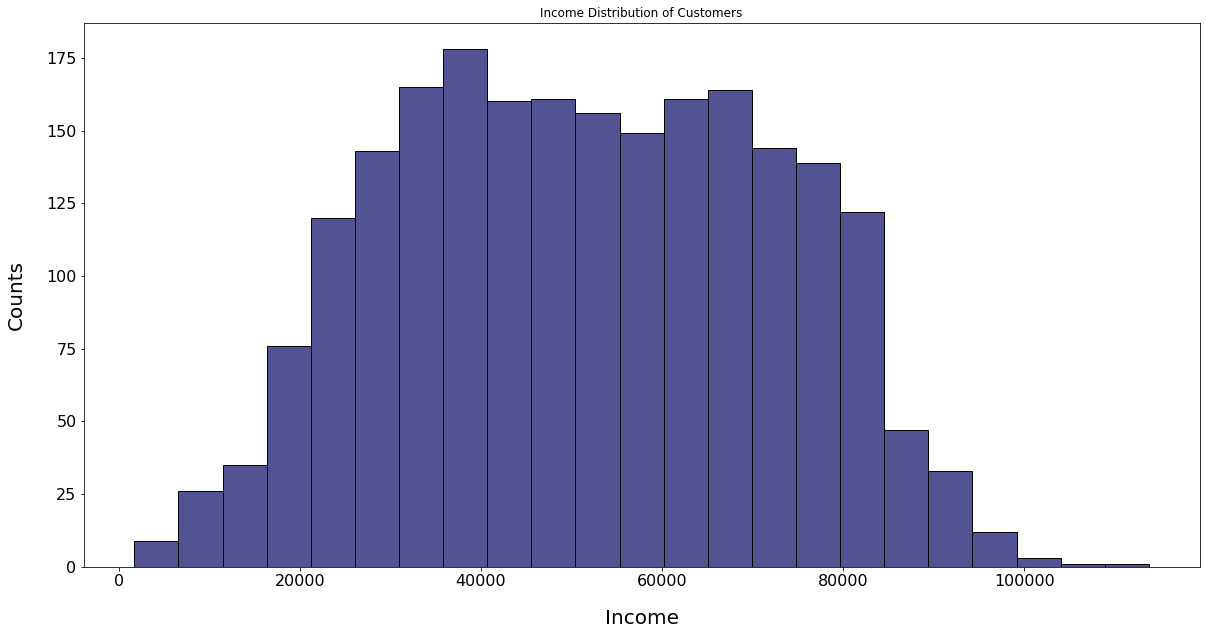

In [25]:
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = customer.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

<b>Insights:</b>

The salaries of the customers have normal distribution with most of the customers earning between 25000 and 85000

### Relationship: Income vs Spendings

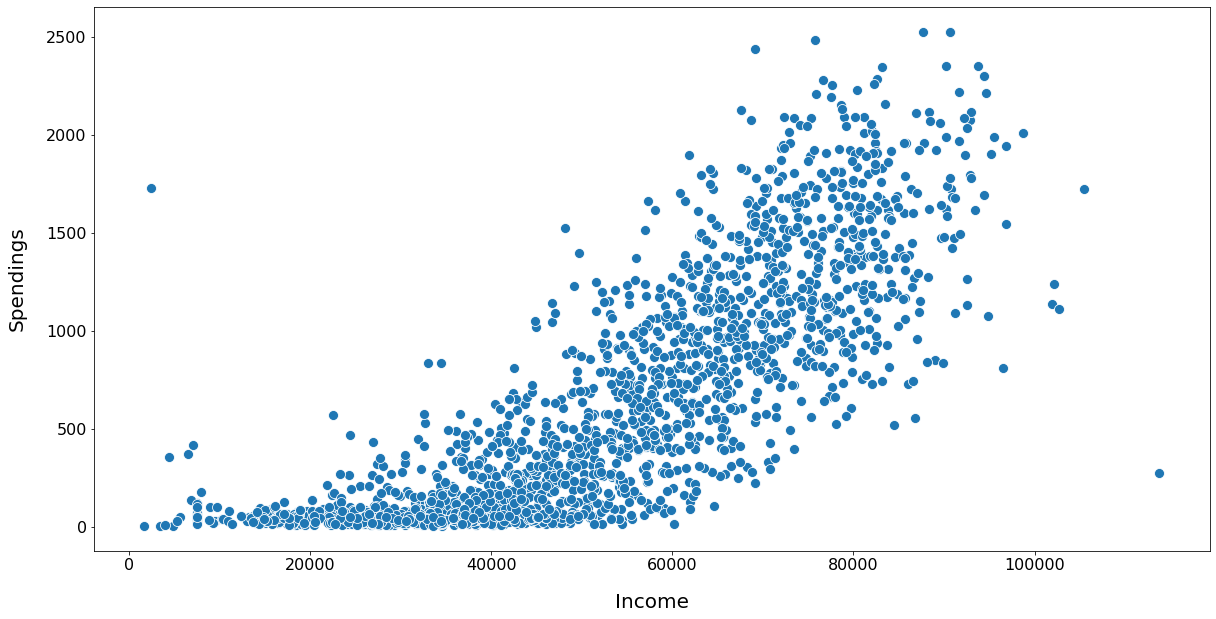

In [26]:
plt.figure(figsize=(20,10))


sns.scatterplot(x=customer.Income, y=customer.TotalSpendings, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

<b>Insights:</b>

The relationship is linear. Customers having higher salaries are spending more

### Most Bought Products

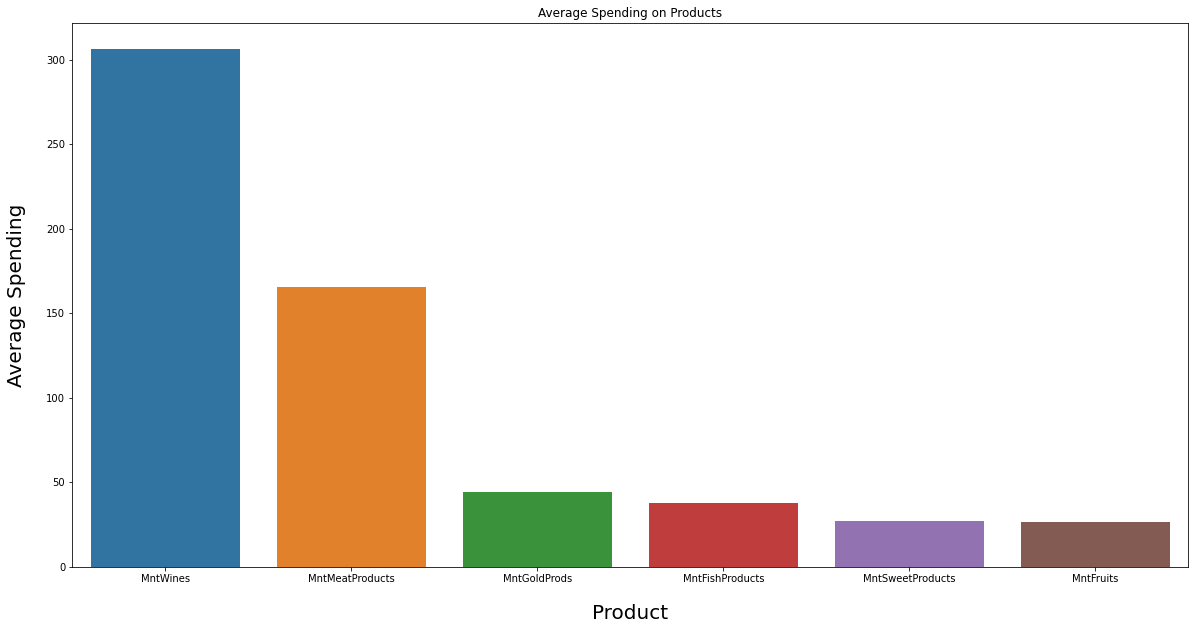

In [27]:
products = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_means = products.mean(axis=0).sort_values(ascending=False)
product_means_df = pd.DataFrame(list(product_means.items()), columns=['Product', 'Average Spending'])

plt.figure(figsize=(20,10))
plt.title('Average Spending on Products')
sns.barplot(data=product_means_df, x='Product', y='Average Spending');
plt.xlabel('Product', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

<b>Insights:</b>

- Wine and Meats products are the most famous products among the customers
- Sweets and Fruits are not being purchased often

## Modelling Clusters

Let's find out the different segmenst of the customers based on different features of the customers data using the K-Means Clusters. Let's first drop the unnecessary columns from the data.

In [28]:
X = customer.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

### Optimum Clusters Using Elbow Method

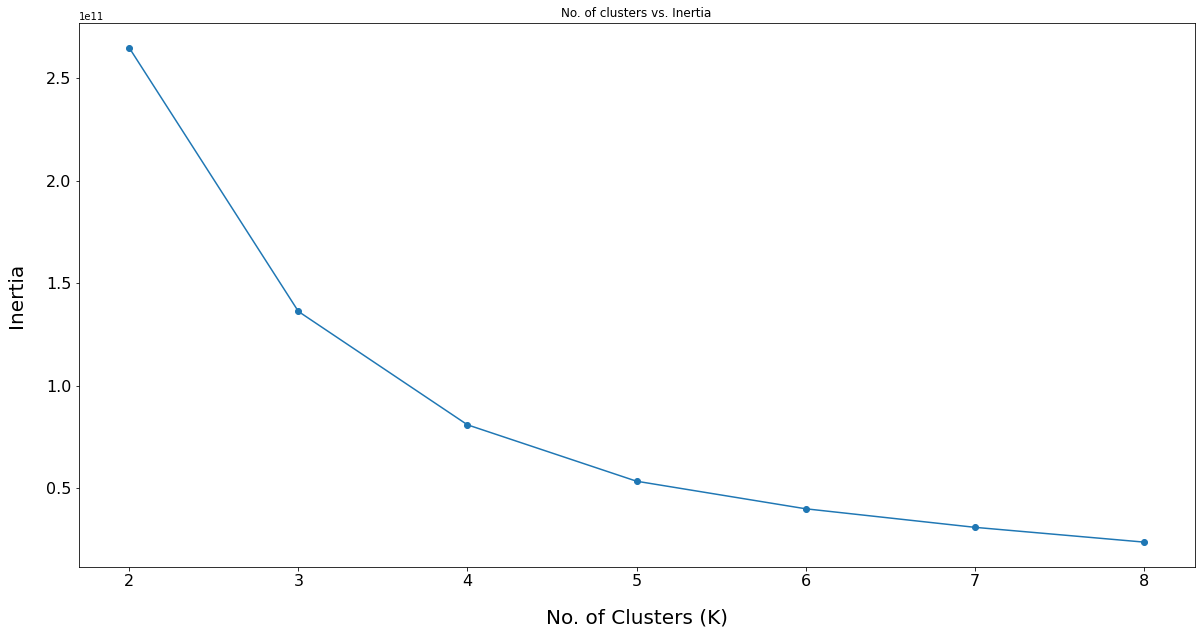

In [29]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(20,10))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=20, labelpad=20)
plt.ylabel('Inertia', fontsize=20, labelpad=20);

<b>Insights:</b>

Based on the above plot we will segment the customers into 4 clusters, as the inertia value donot decrase much after 4 clusters

In [30]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

### Clusters Identification

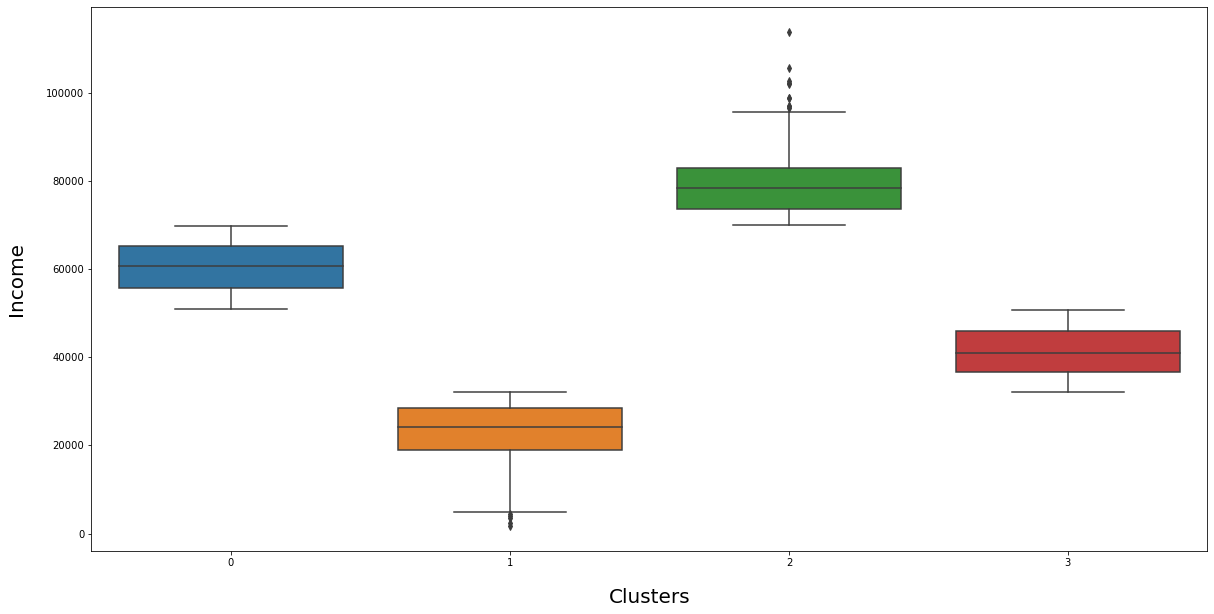

In [31]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Income', fontsize=20, labelpad=20);

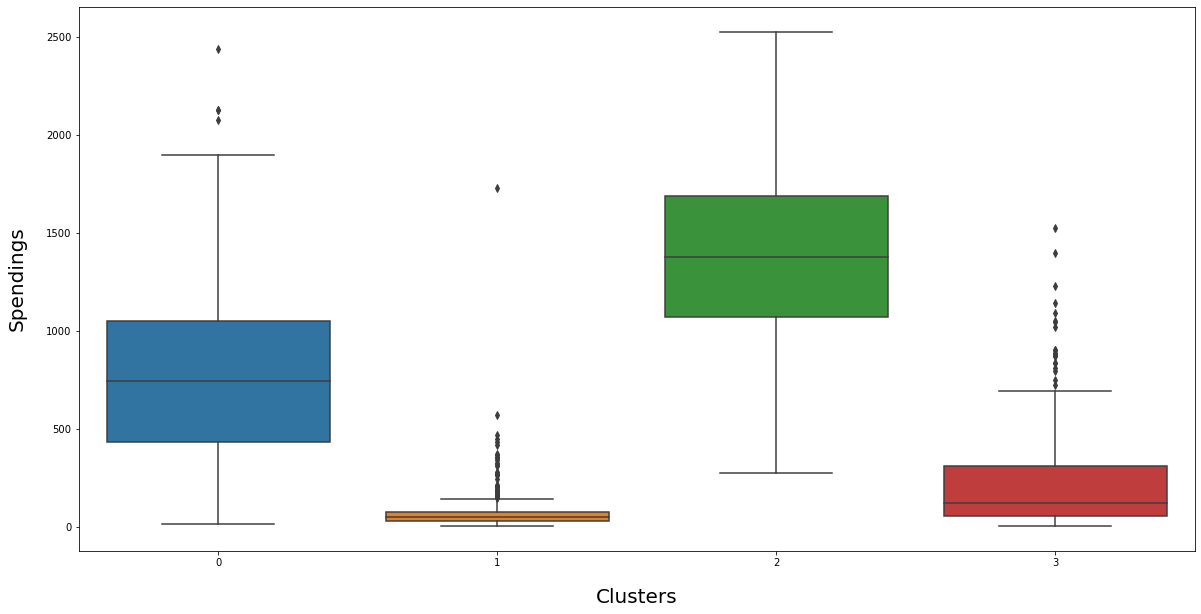

In [32]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'TotalSpendings');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);

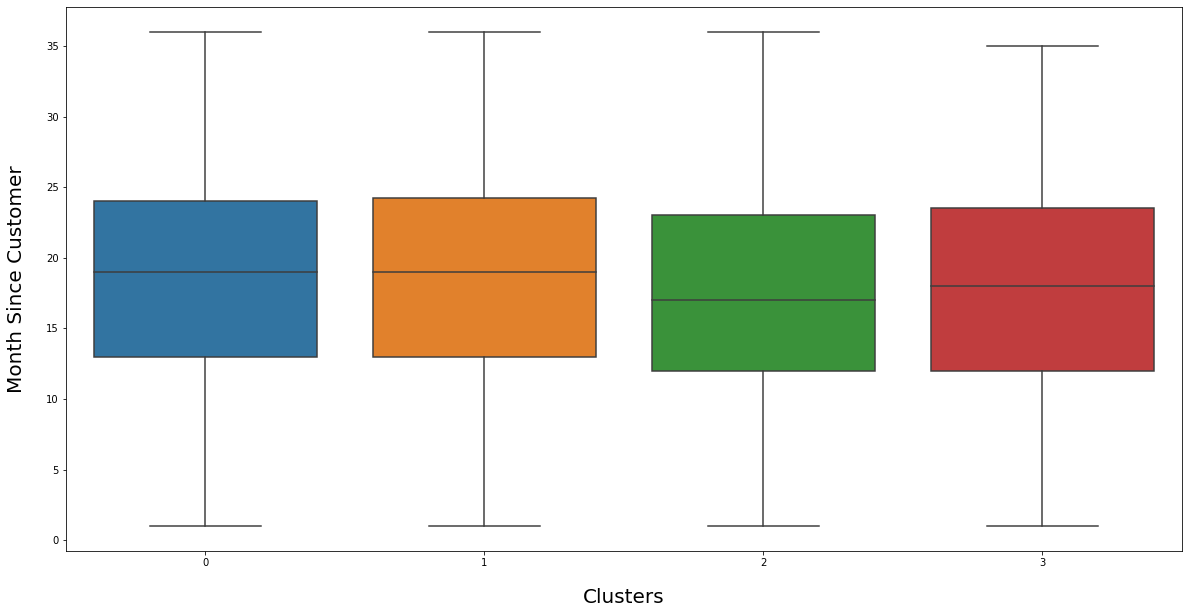

In [33]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Month_Customer');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Month Since Customer', fontsize=20, labelpad=20);

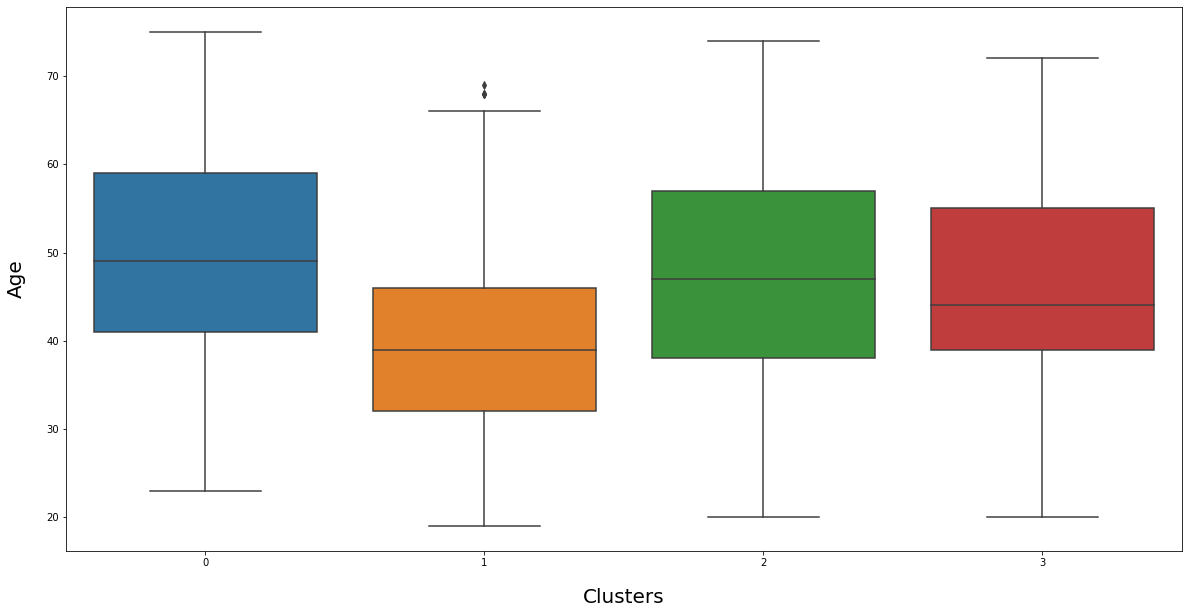

In [34]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Age');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Age', fontsize=20, labelpad=20);

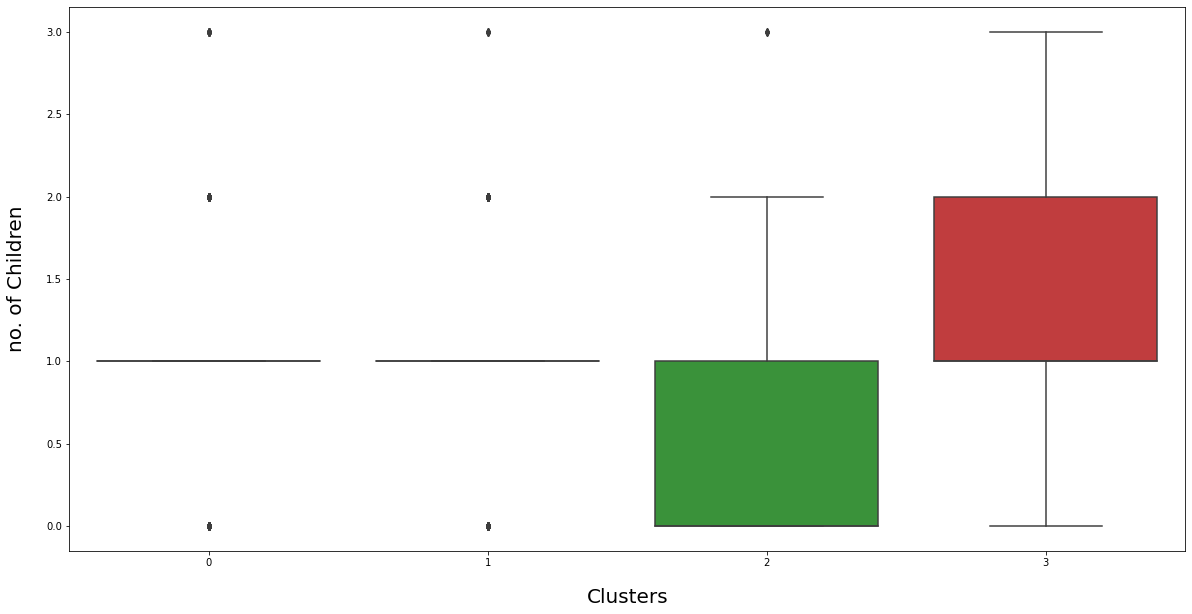

In [35]:
plt.figure(figsize=(20,10))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Children');
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('no. of Children', fontsize=20, labelpad=20);

### Clusters Interpretation

From the above analysis we can segment the customers into 4 groups based on their income and total spendings:

<b>Platinum:</b> The one's with highest earnings and highest spendings

<b>Gold:</b> The one's with high earnings and high spendings

<b>Silver:</b> The one's having low salary and less spendings

<b>Bronze:</b> The one's having lowest salary and least spendings

### Data Exploration: Clusters Based

In [36]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({1: 'Bronze',
                                                             2: 'Platinum',
                                                             3: 'Silver',
                                                             0: 'Gold'})

customer['clusters'] = customer_kmeans.clusters

### Customers Distribution

In [37]:
cluster_counts = customer.clusters.value_counts()

fig = px.pie(cluster_counts, 
             values = cluster_counts.values, 
             names = cluster_counts.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

<b>Insights:</b>

- Most of the customers lie in the Silver and Gold categories, about 29% and 28% respectively
- Platinum is the 3rd famous category of customers with 23% while only 20% occupy the bronze category

### Relationship: Income vs. Spendings

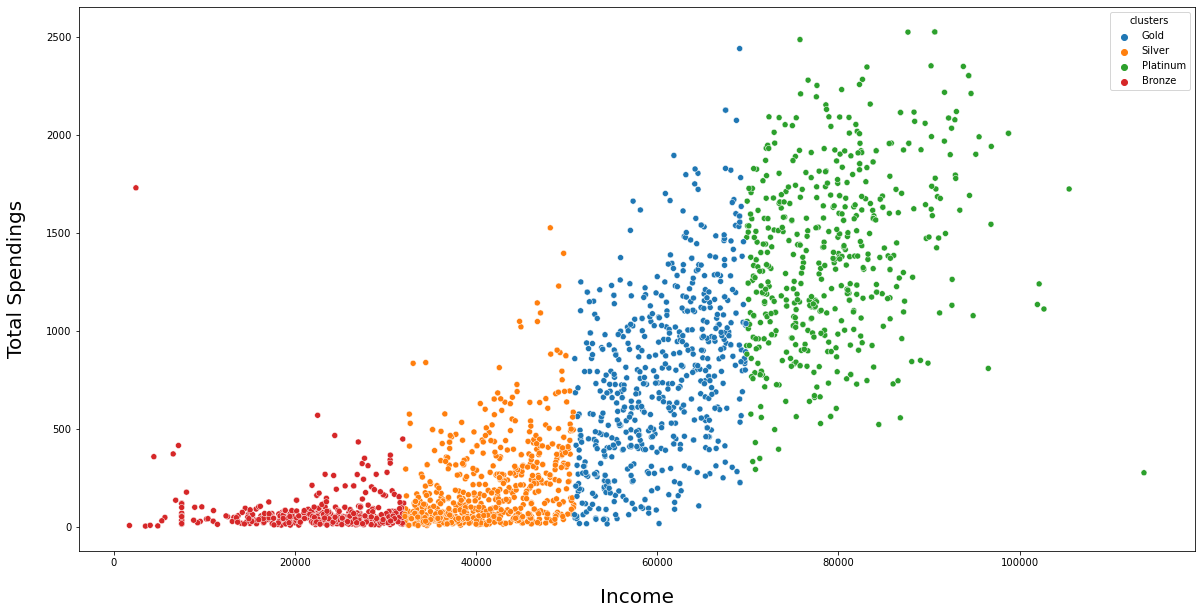

In [38]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=customer, x='Income', y='TotalSpendings', hue='clusters');
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Total Spendings', fontsize=20, labelpad=20);

<b>Insights:</b>

- The 4 clusters can easily be identified from the above plot
- Those earning more are also spending more

### Spending Habits by Clusters

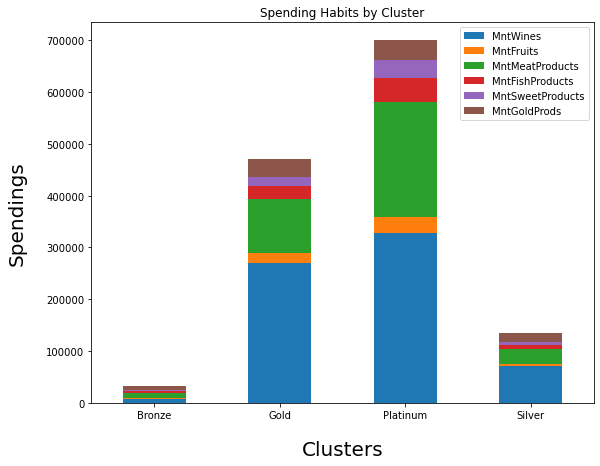

In [39]:
cluster_spendings = customer.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

cluster_spendings.plot(kind='bar', stacked=True, figsize=(9,7))

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<b>Insights:</b>

Customers from all the segments have spent most of their money on Wine and Meat products

### Purchasing Habits by Clusters

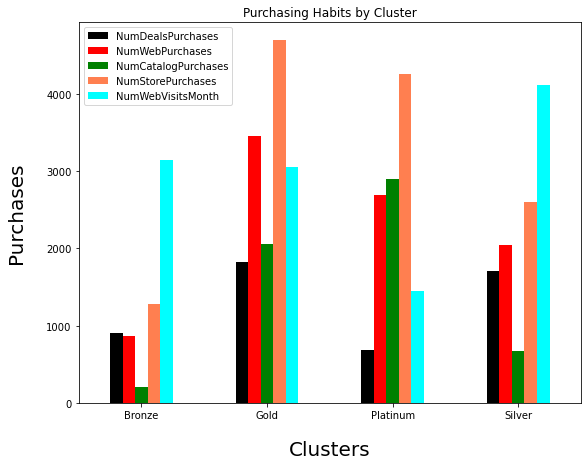

In [40]:
cluster_purchases = customer.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

cluster_purchases.plot(kind='bar', color=['black', 'red', 'green', 'coral', 'cyan'], figsize=(9,7))

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<b>Insights:</b>

- Platinum and Gold Customers mostly likely to do store purchasing
- Most of the web and catalog purchases are also done by the customers from Platinum and Gold segments
- Silver and Gold categoriesnalso like to buy from the stores
- Deal purchases are common among the Gold and Silver customers
- Silver category customers made the most number of web visits while customers from Platinum segment have least web visits

### Promotions Acceptance by Clusters

<Figure size 2160x1080 with 0 Axes>

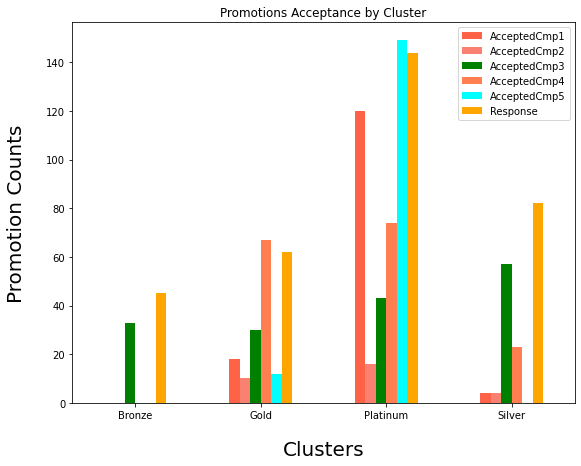

In [41]:
cluster_campaign = customer.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(30,15))
cluster_campaign.plot(kind='bar', color=['tomato', 'salmon', 'green', 'coral', 'cyan', 'orange'],figsize=(9,7))

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<b>Insights:</b>

- Platinum customers accepted the most of the offers from the comapany
- Compaign 1, 5 and final one seems to be the most successful one's
- Bronze category showed the least interest in the promotion campaings of the company

## Conclusion

- Most of the customers are university graduates
- Most of the customers are living with partners
- Those living alone have spent more than those living with partners
- Most of the customers have only one child
- Those having no children have spent more
- Middle Age Adults, aged between 40 and 60, are famous age group category
- Middle Age Adults are spending on average, more than the other age groups
- Most of the customers are earning between 25000 and 85000
- Wine and Meat products are very famous among the customers
- On the basis of income and total spendings, customers are divided into 4 clusters i.e. Platinum, Gold, Silver and Bronze
- Most of the customers fall into the Silver and Gold categories
- Those who are earning more are also spending more
- Most of the customers like to buy from store and then online from the web
- Platinum customers showed more acceptance towards promotion campaigns while bronze customers the least interest